Артем Жук, 399 группа
# EM for PCA

Тут размещены различного рода графики, демонстрирующие работу алгоритма.

## EMPCA

In [1]:
from empca import EMPCA
from empca_missing import EMPCAM
from sklearn.decomposition import PCA
import numpy as np
from utils import random_model, gram_schmidt, span_in, add_missing
import matplotlib.pyplot as plt
from copy import deepcopy
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
%matplotlib inline

##### Демонстрация работы в двумерном случае
Посмотрим на работу нашего алгоритма в двумерном случае. Синие точки -- исходная данная с шумом, красные -- восстановленная зависимость по одной компотненте.

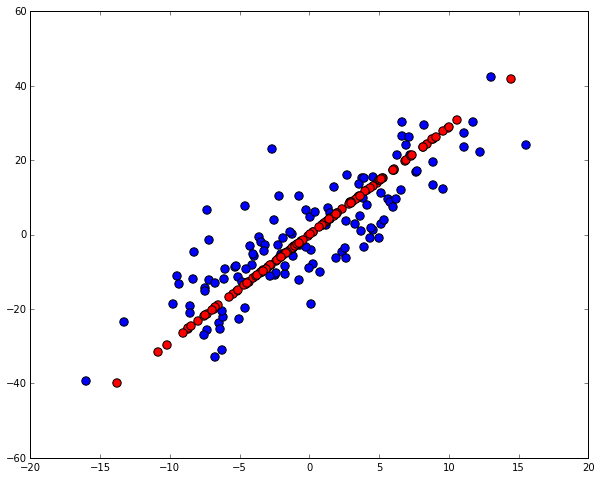

In [2]:
W = np.array([[5, 15]]).T 
X, W, T = random_model(120, 2, 1, W=W, eps=10) 
Xt = deepcopy(X) # original data

empca = EMPCA(n_components=1, n_iter=100)
Xf = empca.fit_transform(X).dot(empca.components_)

plt.figure(figsize=(10, 8))
plt.scatter(Xt[:, 0], Xt[:, 1], c='b', cmap='summer', s=70)
plt.scatter(Xf[:, 0], Xf[:, 1], c='r', cmap='summer', s=70)
plt.show()


##### Зависимость от числа итераций
Теперь посмотрим, как меняется картина с числом итераций. 

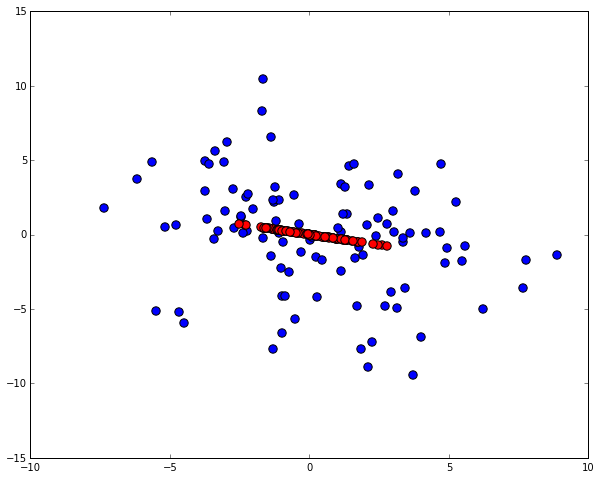

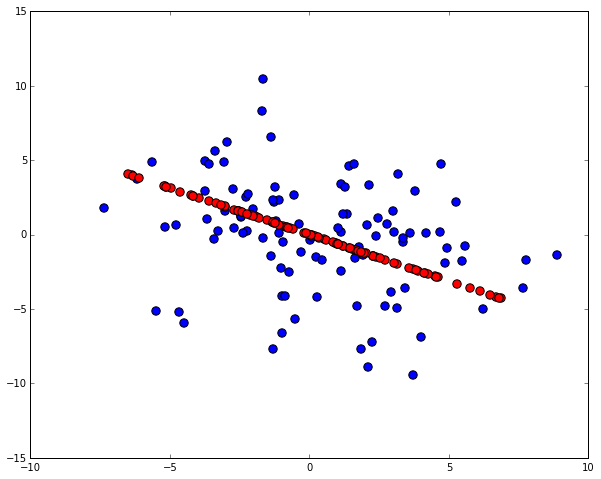

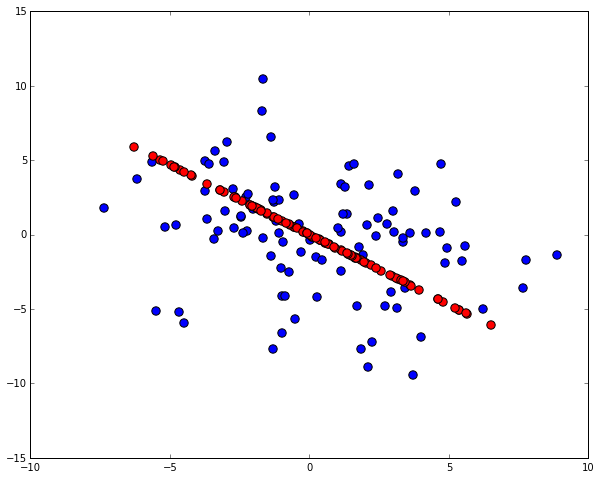

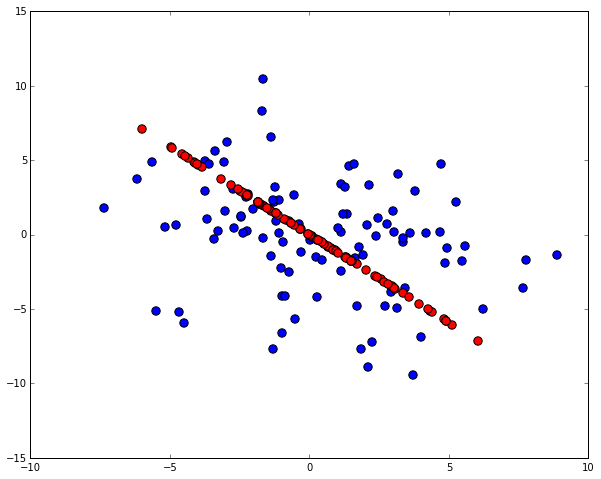

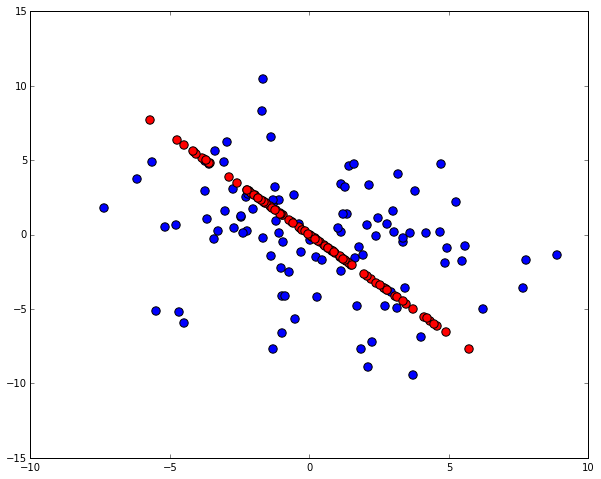

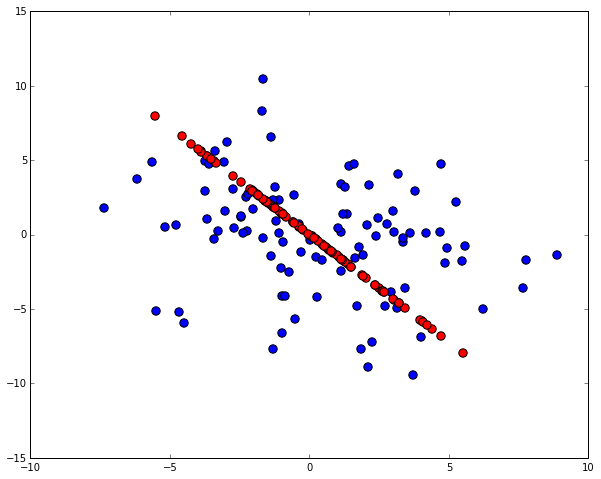

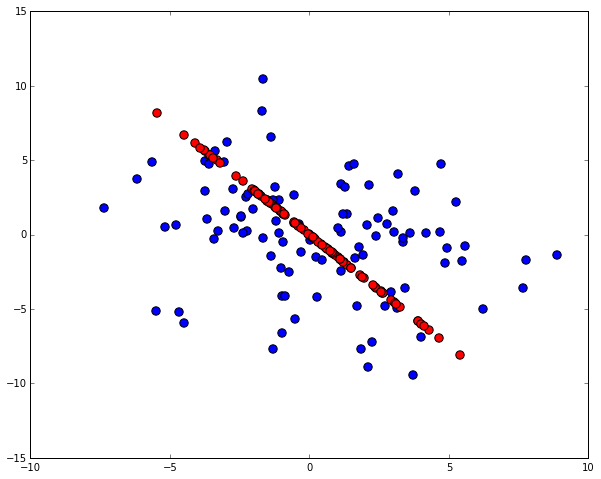

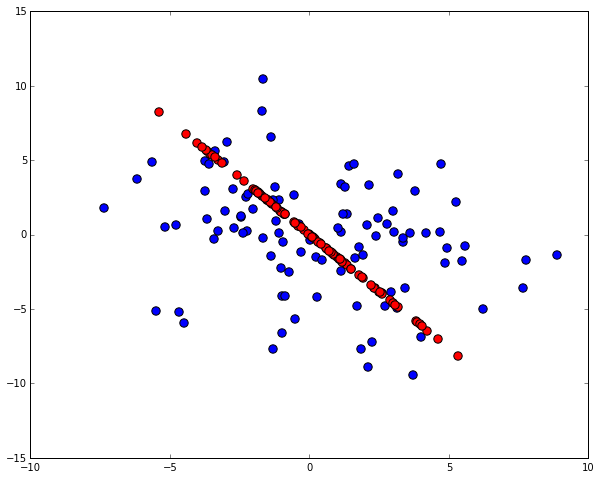

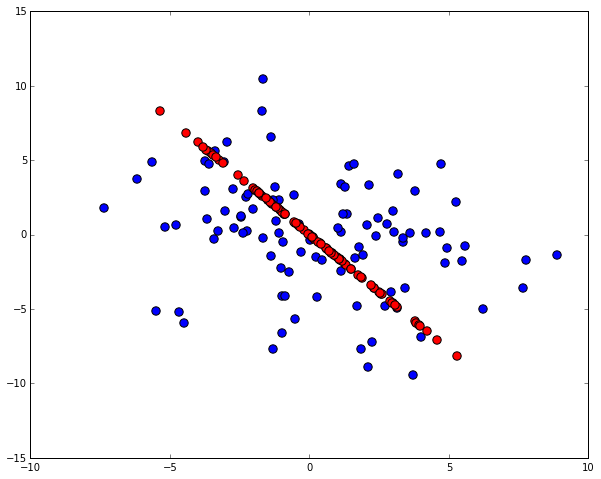

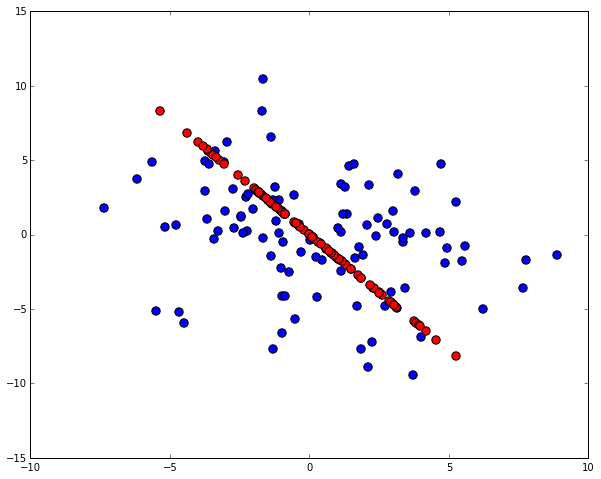

In [3]:
W = np.array([[-1, 3]]).T 
X, W, T = random_model(100, 2, 1, W=W, eps=10) 
empca = EMPCA(n_components=1)
empca.init_(X)

Xt = deepcopy(X) # original data

for k in range(10):
    Xf = empca.transform(X).dot(empca.components_)
    plt.figure(figsize=(10, 8))
    plt.scatter(Xt[:, 0], Xt[:, 1], c='b', cmap='summer', s=70)
    plt.scatter(Xf[:, 0], Xf[:, 1], c='r', cmap='summer', s=70)
    plt.show()
    
    for _ in range(1):
        empca.make_iteration_()
    

Как видим, сходится довольно быстро.

##### Зависимость среднеквадратической ошибки от числа итераций

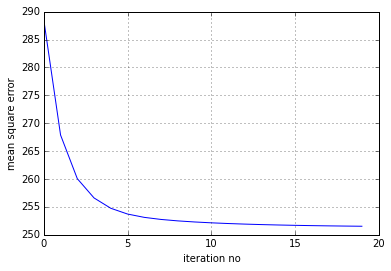

In [4]:
X, W, T = random_model(50, 100, 50, eps=10)
empca = EMPCA(n_components=10)
empca.init_(X)

n = 20
err = []
for _ in range(n):
    empca.make_iteration_()
    err.append(empca.mean_square_error(X))

x = np.arange(0, n, 1)

plt.xlabel('iteration no')
plt.ylabel('mean square error')
plt.grid(True)
plt.plot(x, err)
plt.show()



#### Применение к обработке изображений

Возьмем изображение, разобьем на блоки 10 х 10 и спроецируем на разное число главных векторов. 

(918, 900, 4)


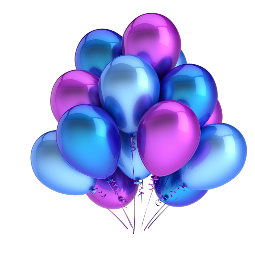

In [37]:
pic = plt.imread('ballon.png')
print(pic.shape)
plt.imshow(pic)
plt.axis('off')
plt.show()
pic = np.delete(pic, range(910, 918), 0)
blocks = pic.reshape(91 * 90, 10 * 10 * 4)

In [44]:

# print(pic.shape)

def compress(n_components):
    empca = EMPCA(n_components=n_components, n_iter=10)
    empca.fit(blocks)
    print(empca.explained_variance_ratio_)
    Y = empca.transform(blocks)
    npic = empca.inverse_transform(Y)

    npic = np.reshape(npic, pic.shape)

    plt.imshow(npic)
    plt.axis('off')
    plt.title('n_components=' + str(n_components))
    plt.show()

CPU times: user 9 µs, sys: 3 µs, total: 12 µs
Wall time: 22.6 µs
[ 0.62624528  0.35461425  0.08529397  0.09598055  0.04932098  0.03277645
  0.0232766   0.01691224  0.02886347  0.01517597  0.01457204  0.01150207
  0.00390367  0.00544262  0.00380963  0.00562226  0.0029375   0.00480578
  0.0036589   0.00221204  0.00172051  0.00148121  0.00216539  0.00210253
  0.0017151   0.00153713  0.00178855  0.00156467  0.00161488  0.00097628]


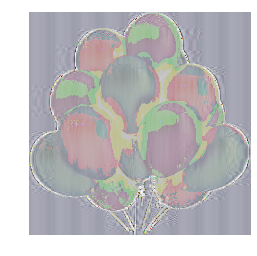

In [39]:
% time
compress(30)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 675 µs
[  3.74043714e-01   5.93937588e-01   1.94927737e-01   3.64654570e-02
   3.44510621e-02   5.38531477e-02   2.27518320e-02   4.39464583e-02
   1.14610191e-02   1.39442910e-02   2.80850458e-02   1.76937594e-02
   9.04567727e-03   8.65625714e-03   4.93996739e-03   3.20778395e-03
   5.57606886e-03   4.02803617e-03   6.88229897e-03   3.45119175e-03
   5.73943761e-03   2.52717005e-03   2.89285547e-03   2.01955787e-03
   1.63418346e-03   1.73471969e-03   1.45773983e-03   1.02166895e-03
   1.50222632e-03   1.27817968e-03   1.12458626e-03   1.63861634e-03
   1.28218621e-03   1.01738257e-03   1.40284561e-03   1.43343806e-03
   8.99637377e-04   8.92369794e-04   9.73922207e-04   8.43875832e-04
   8.31463138e-04   7.25993584e-04   7.15845815e-04   7.37624570e-04
   7.33335757e-04   6.22373496e-04   6.85326137e-04   5.76045011e-04
   5.78636455e-04   5.50757564e-04   4.22128629e-04   5.33847486e-04
   4.48974738e-04   4.44952478e-04   4.2

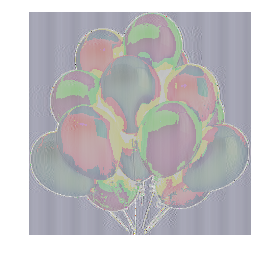

In [40]:
% time
compress(60)

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 18.1 µs
[ 0.68836223  0.19975525  0.15494592  0.0285285   0.02331122  0.02464464
  0.00698194  0.01327181  0.00659317  0.01314331  0.00440409  0.00742552
  0.00538847  0.00446086  0.00383912]


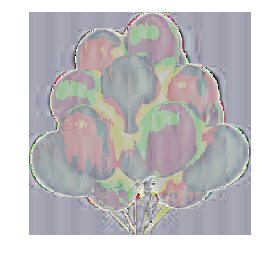

In [41]:
% time
compress(15)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.87 µs
[ 0.71837987  0.11042856  0.07618939  0.070904    0.02785108]


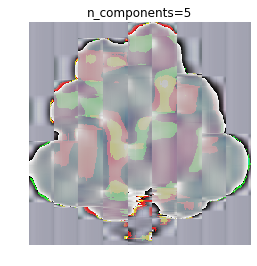

In [45]:
% time
compress(5)

#### EMPCAM
Этот класс реализует тот же алгоритм, но допускает пропуски в данных. 


Применим его для восстановления компонент. Сгенерируем выборку, а потом удалим 20% точек. 
Синие точки -- исходная выборка с шумом, красные -- восстановленная зависимость.

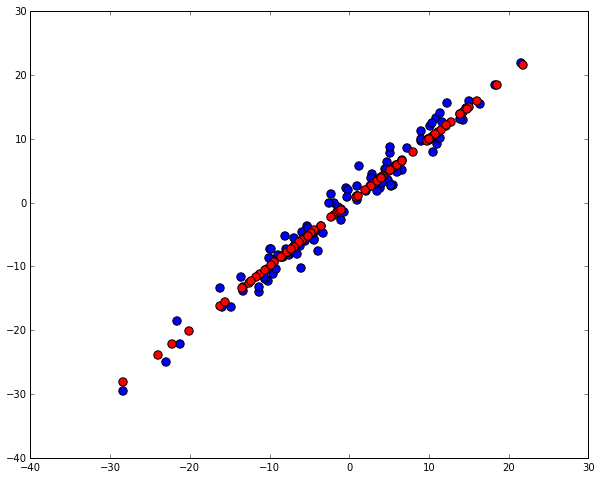

In [12]:
W = np.array([[10, 10]]).T
X, W, T = random_model(100, 2, 1, W=W, eps=2)

Xt = deepcopy(X) # original data

add_missing(X, .2) # deletes 20% of points
empcam = EMPCAM(n_components=1, n_iter=100)
empcam.fit(X)

Xf = empcam.fill_missing(X)

plt.figure(figsize=(10, 8))
plt.scatter(Xt[:, 0], Xt[:, 1], c='b', cmap='summer', s=70)
plt.scatter(Xf[:, 0], Xf[:, 1], c='r', cmap='summer', s=70)
plt.show()


